# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

Symbols Used in Tables
  - (B) Base less than 75,000
  - (X)  Estimate is not applicable or not available
  - (Z) Rounds to zero

### Upgrade Plotly

Run the cell below if you are working with Google Colab

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
import plotly.io as poi

poi.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [4]:
poi.renderers.default = "notebook+notebook_connected"

## Load the Data

In [5]:
df_hh_income = pd.read_csv('./data/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('./data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('./data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('./data/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('./data/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_hh_income.shape, df_pct_poverty.shape, df_pct_completed_hs.shape, df_share_race_city.shape, df_fatalities.shape

((29322, 3), (29329, 3), (29329, 3), (29268, 7), (2535, 14))

In [7]:
df_hh_income.columns, df_pct_poverty.columns, df_pct_completed_hs.columns, df_share_race_city.columns, df_fatalities.columns

(Index(['Geographic Area', 'City', 'Median Income'], dtype='object'),
 Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object'),
 Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object'),
 Index(['Geographic area', 'City', 'share_white', 'share_black',
        'share_native_american', 'share_asian', 'share_hispanic'],
       dtype='object'),
 Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
        'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
        'flee', 'body_camera'],
       dtype='object'))

In [8]:
df_hh_income.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [9]:
df_pct_poverty.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [10]:
df_pct_completed_hs.isna().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [11]:
df_share_race_city.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [12]:
df_fatalities.isna().sum(), df_fatalities.isna().any(axis=1).sum() 

(id                           0
 name                         0
 date                         0
 manner_of_death              0
 armed                        9
 age                         77
 gender                       0
 race                       195
 city                         0
 state                        0
 signs_of_mental_illness      0
 threat_level                 0
 flee                        65
 body_camera                  0
 dtype: int64,
 281)

- axis=1 refers to columns, it means that the operation is being applied across the columns for each row. 


In [13]:
df_hh_income.duplicated().sum(), df_pct_poverty.duplicated().sum(), df_pct_completed_hs.duplicated().sum(), df_share_race_city.duplicated().sum(), df_fatalities.duplicated().sum()

(0, 0, 0, 0, 0)

In [14]:
symbols = ['(X)', '(B)', '(X)']
(df_hh_income[df_hh_income['Median Income'].isin(symbols)])['Median Income'].value_counts()

Median Income
(X)    1113
Name: count, dtype: int64

## Data Wrangling for df_hh_income

In [15]:
df_hh_income.duplicated().sum()

0

In [16]:
df_hh_income.head()

Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575
3              AL     Addison town         37083
4              AL       Akron town         21667

In [17]:
df_hh_income["Median Income"] =  pd.to_numeric(df_hh_income["Median Income"], errors="coerce")

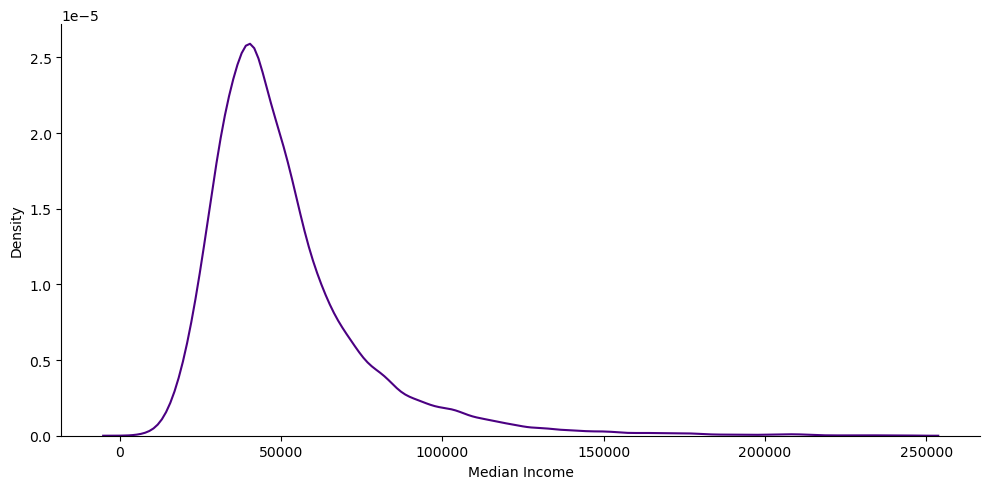

In [18]:
sns.displot(data=df_hh_income, x="Median Income", kind="kde", color="indigo", aspect=2)

plt.show()

- Seems to me right-skewed data, so we can replace NaN with median, which makes it resilient to outliers

In [19]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].fillna(df_hh_income["Median Income"].median())

## Data Wrangling for df_pct_poverty

In [20]:
df_pct_poverty.iloc[573]

Geographic Area             AL
City               Whatley CDP
poverty_rate                 -
Name: 573, dtype: object

In [21]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [22]:
df_pct_poverty["poverty_rate"].isna().sum()

201

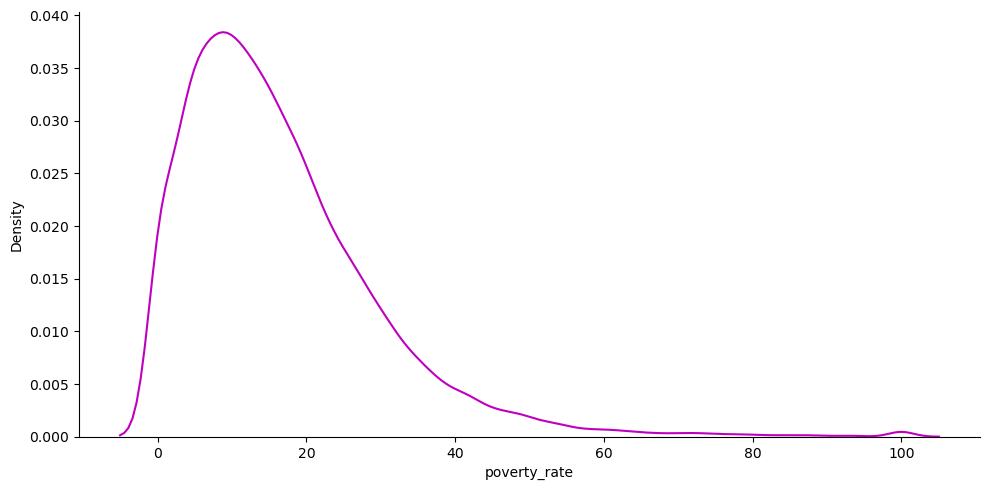

In [23]:
sns.displot(data=df_pct_poverty, x="poverty_rate", kind="kde", color="m", aspect=2)

plt.show()

In [24]:
# Looking at the distribution, let's see how many data with zero and which state and city
poverty_zero = df_pct_poverty[df_pct_poverty.poverty_rate <= 0]
poverty_zero.shape

(1464, 3)

In [25]:
poverty_zero["City"].unique()

array(['Benton town', 'Bucks CDP', 'Catherine CDP', ..., 'Washam CDP',
       'Whiting CDP', 'Y-O Ranch CDP'], dtype=object)

In [26]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].fillna(df_pct_poverty["poverty_rate"].median())

## Data Wrangling for df_pct_completed_hs

In [27]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [28]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")

In [29]:
df_pct_completed_hs.isna().sum()

Geographic Area           0
City                      0
percent_completed_hs    197
dtype: int64

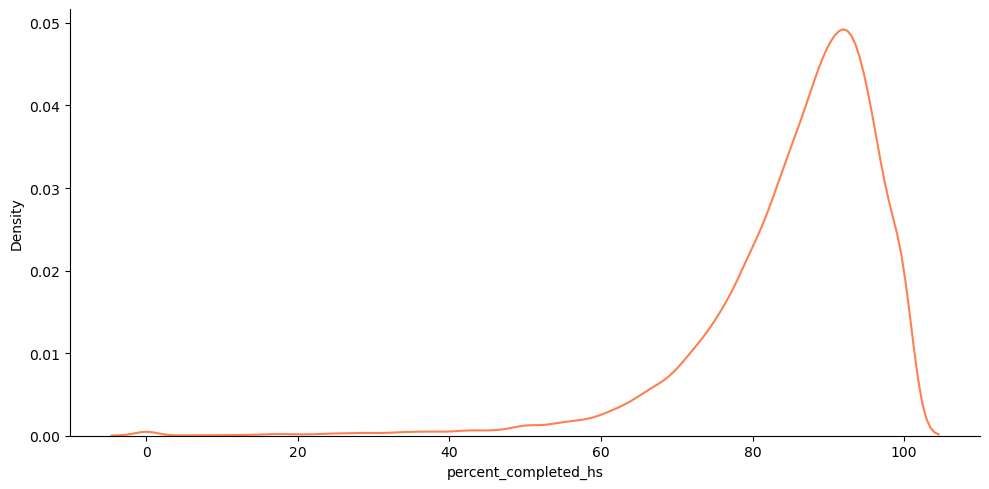

In [30]:
sns.displot(data=df_pct_completed_hs, x="percent_completed_hs", kind="kde", color="coral", aspect=2)

plt.show()

In [31]:
df_pct_completed_hs["percent_completed_hs"]= df_pct_completed_hs["percent_completed_hs"].fillna(df_pct_completed_hs["percent_completed_hs"].median())

## Data Wrangling for df_share_race_city


In [32]:
(df_share_race_city[df_share_race_city['share_native_american'].isin(symbols)])['share_native_american'].value_counts()

share_native_american
(X)    20
Name: count, dtype: int64

- There are 20 city where data is not available; let just drop those rows

In [33]:
index_to_drop = df_share_race_city[df_share_race_city['share_native_american'].isin(symbols)].index

In [34]:
df_share_race_city.drop(index_to_drop, axis=0, inplace=True)

In [35]:
#changing the data type to number

df_share_race_city["share_white"] = pd.to_numeric(df_share_race_city["share_white"])
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"])
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"])
df_share_race_city["share_asian"] = pd.to_numeric(df_share_race_city["share_asian"])
df_share_race_city["share_hispanic"] = pd.to_numeric(df_share_race_city["share_hispanic"])

df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29248 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29248 non-null  object 
 1   City                   29248 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


In [36]:
df_share_race_city.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

## Data Wrangling for df_fatalities

In [37]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [38]:
df_fatalities.sample(10)

id                 name      date   manner_of_death    armed   age  \
1491  1688      Helmut Wihowski  01/07/16              shot    knife 58.00   
661    791       David M.  Leon  30/08/15              shot      gun 40.00   
1435  1624   Mohammad Moghaddam  14/06/16              shot      gun 54.00   
253    297         Walter Scott  04/04/15  shot and Tasered  unarmed 50.00   
302    396    Reginald McGregor  22/04/15              shot      gun 31.00   
1646  1848                TK TK  01/09/16  shot and Tasered     pipe   NaN   
2462  2743  Tiffany Lynn Potter  05/07/17              shot      gun 29.00   
2287  2544  Peter Raymond Selis  30/04/17              shot      gun 49.00   
135    175    Anthony Giaquinta  23/02/15              shot      gun 41.00   
45      85         Dewayne Carr  20/01/15              shot  vehicle 42.00   

     gender race              city state  signs_of_mental_illness  \
1491      M    W           Jackson    WI                    False   
661       M    H            Tucson    AZ                    False   
1435      M    O          Amarillo    TX                    False   
253       M    B  North Charleston    SC                    False   
302       M    B        Fort Worth    TX                    False   
1646      M    H   Huntington Park    CA                    False   
2462      F    W        Des Moines    IA                    False   
2287      M    W   University City    CA                    False   
135       M    W      Clarkesville    GA                    False   
45        M    B        Scottsdale    AZ                    False   

     threat_level         flee  body_camera  
1491        other  Not fleeing        False  
661        attack  Not fleeing        False  
1435       attack  Not fleeing        False  
253         other         Foot        False  
302        attack         Foot        False  
1646        other  Not fleeing        False  
2462       attack         Foot         True  
2287       attack  Not fleeing        False  
135        attack         Foot        False  
45          other          Car        False

In [39]:
df_fatalities["date"]=pd.to_datetime(df_fatalities["date"], errors='raise', format="%d/%m/%y")
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2526 non-null   object        
 5   age                      2458 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2340 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2470 non-

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [40]:
df_pct_poverty.head()

Geographic Area             City  poverty_rate
0              AL       Abanda CDP         78.80
1              AL   Abbeville city         29.10
2              AL  Adamsville city         25.50
3              AL     Addison town         30.70
4              AL       Akron town         42.00

In [41]:
poverty_rate_state = df_pct_poverty.groupby(["Geographic Area"], as_index=False).agg({"poverty_rate":pd.Series.mean})

In [42]:
h_bar=px.bar(poverty_rate_state, orientation='h', x="poverty_rate", y="Geographic Area",
            color="poverty_rate", color_continuous_scale='magma')

h_bar.update_layout(yaxis={"categoryorder": "total ascending"}, coloraxis_showscale=False)

h_bar.show()

- NJ; lowest percent of poverty rate
- highest poverty rate in MS around 27%

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [43]:
highschool_pass_state = df_pct_completed_hs.groupby(["Geographic Area"], as_index=False).agg({"percent_completed_hs":pd.Series.mean})

In [44]:
h_bar=px.bar(highschool_pass_state, orientation='h', x="percent_completed_hs", y="Geographic Area",
            color="percent_completed_hs", color_continuous_scale='magma')

h_bar.update_layout(yaxis={"categoryorder": "total ascending"}, coloraxis_showscale=False)

h_bar.show()

- TX has the lowest high-school graduate rate, around 76%
- whereas MS state of US have the highest graduation rate of 92.38%

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [45]:
# Merging the two DataFrames on the 'Geographic Area' and 'City' columns
poverty_vs_hsgradute = pd.merge(df_pct_poverty, df_pct_completed_hs, on=["Geographic Area", "City"])
poverty_vs_hsgradute.head()

Geographic Area             City  poverty_rate  percent_completed_hs
0              AL       Abanda CDP         78.80                 21.20
1              AL   Abbeville city         29.10                 69.10
2              AL  Adamsville city         25.50                 78.90
3              AL     Addison town         30.70                 81.40
4              AL       Akron town         42.00                 68.60

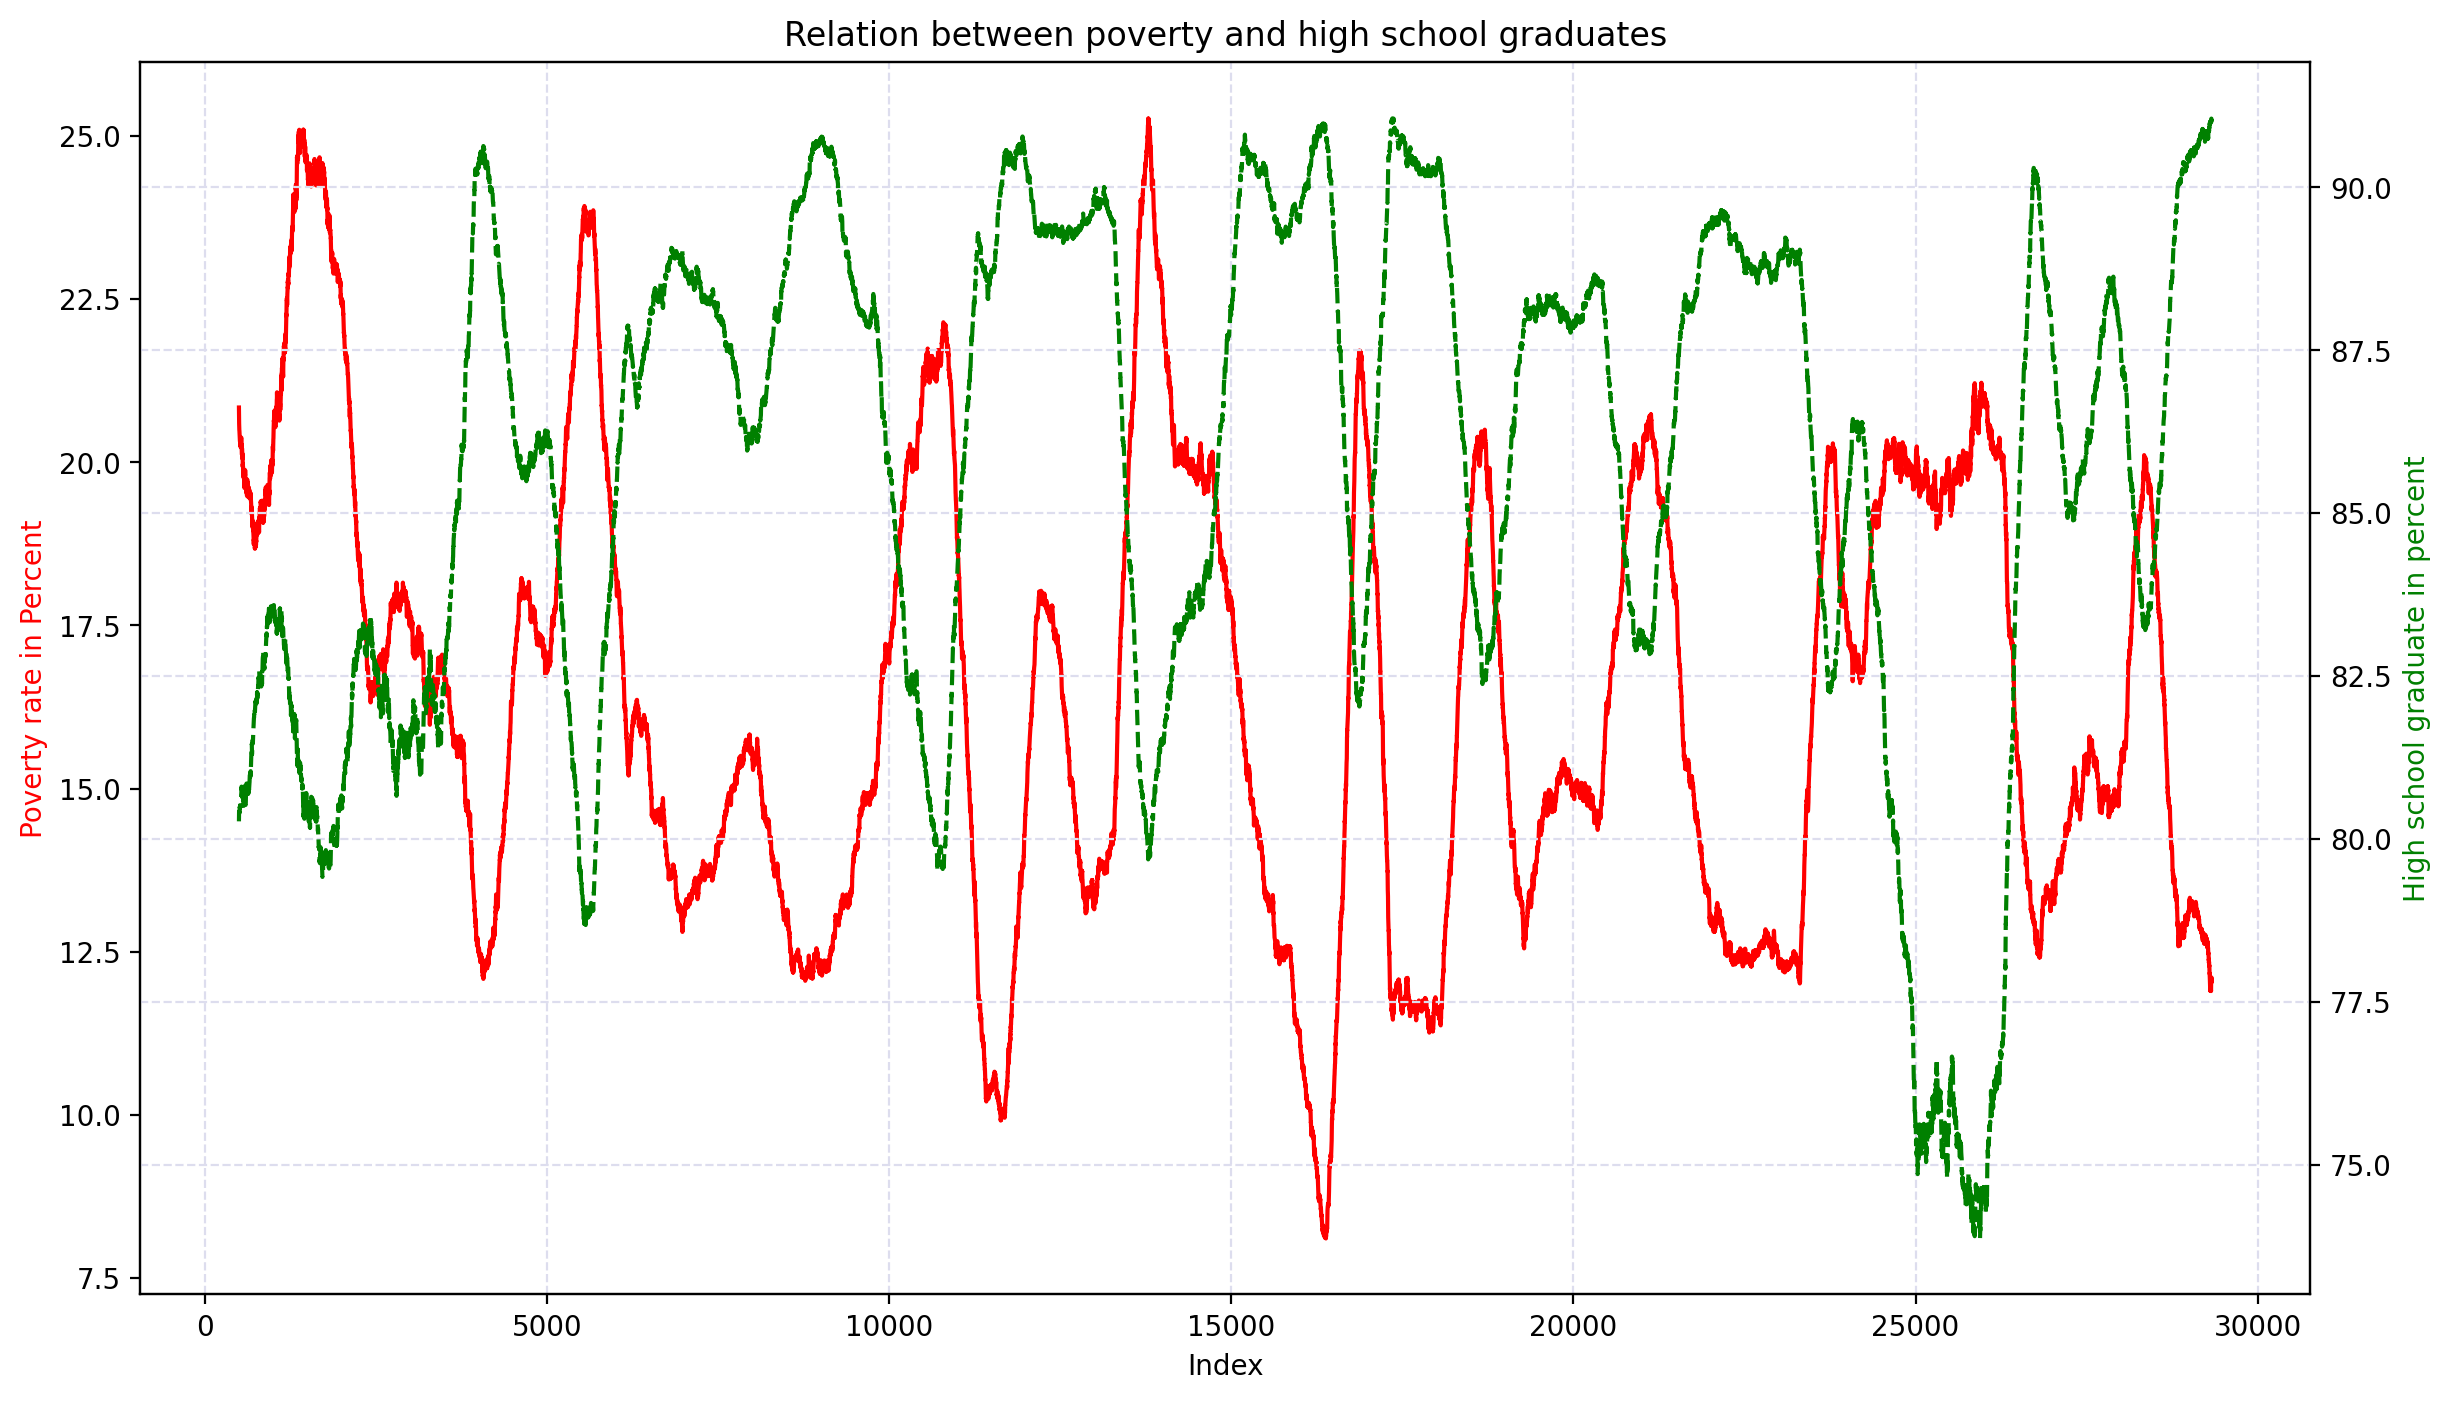

In [46]:
fig, ax = plt.subplots(figsize=(14,8), dpi=200)

ax.plot(poverty_vs_hsgradute.index, poverty_vs_hsgradute.poverty_rate.rolling(500).mean(), c='red')
ax.set_xlabel("Index")
ax.set_ylabel("Poverty rate in Percent", color='red')

ax.xaxis.grid(True, color='#ddddee', linestyle='--')

ax.set(title="Relation between poverty and high school graduates")

ax1 = ax.twinx()

ax1.plot(poverty_vs_hsgradute.index, poverty_vs_hsgradute.percent_completed_hs.rolling(500).mean(), c='green', linestyle='--')
ax1.set_ylabel("High school graduate in percent", color='green')

ax1.yaxis.grid(True, color='#ddddee', linestyle='--')

plt.show()

- As the high school graduate rate is low, the poverty rate increases and visa versa.

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

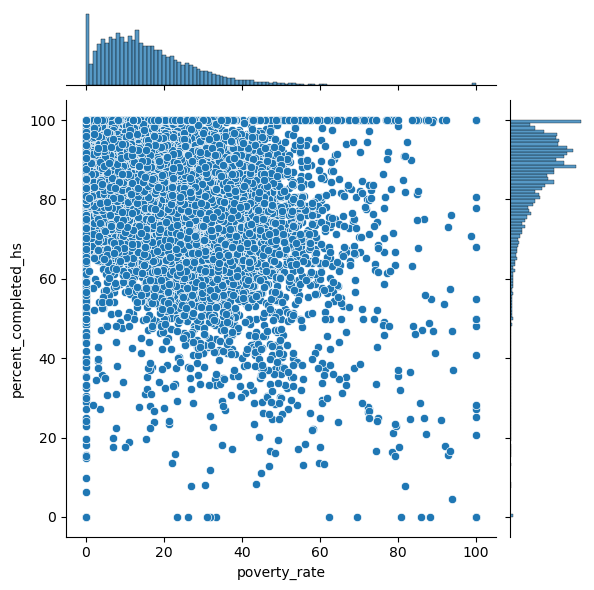

In [47]:
sns.jointplot(poverty_vs_hsgradute, x="poverty_rate", y="percent_completed_hs")

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

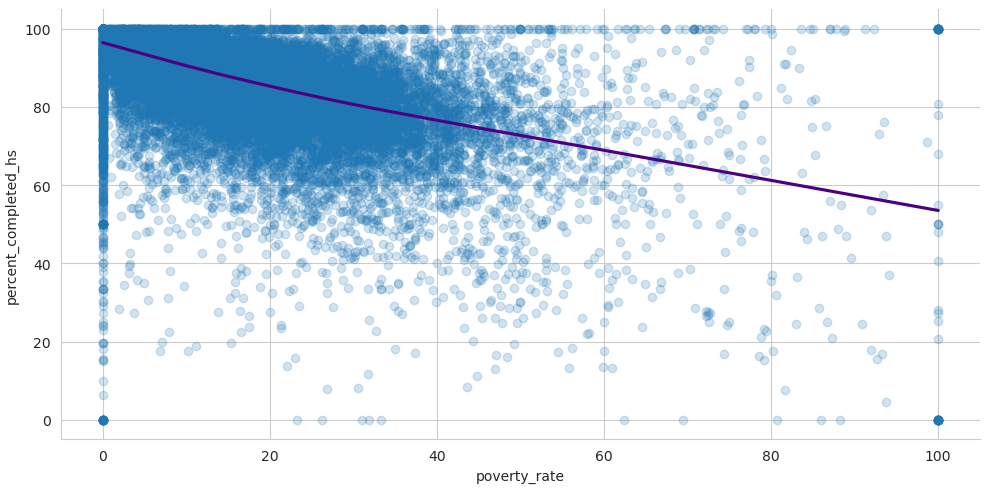

In [48]:
with sns.axes_style("whitegrid"):
    sns.lmplot(poverty_vs_hsgradute, 
               x="poverty_rate", 
               y="percent_completed_hs",
               aspect=2,
               lowess=True,
               scatter_kws = {'alpha': 0.2},
               line_kws={"color":'indigo'})

plt.show()

- As the poverty rate increases the percent of highschool graduate decrease.

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [49]:
df_share_race_city.head()

Geographic area             City  share_white  share_black  \
0              AL       Abanda CDP        67.20        30.20   
1              AL   Abbeville city        54.40        41.40   
2              AL  Adamsville city        52.30        44.90   
3              AL     Addison town        99.10         0.10   
4              AL       Akron town        13.20        86.50   

   share_native_american  share_asian  share_hispanic  
0                   0.00         0.00            1.60  
1                   0.10         1.00            3.10  
2                   0.50         0.30            2.30  
3                   0.00         0.10            0.40  
4                   0.00         0.00            0.30

In [50]:
state_race_pct = df_share_race_city.groupby(["Geographic area"], as_index=False).agg({"share_white":pd.Series.mean, 
                                                               "share_black":pd.Series.mean, 
                                                               "share_native_american":pd.Series.mean,
                                                               "share_asian":pd.Series.mean,
                                                               "share_hispanic":pd.Series.mean})
state_race_pct.head()

Geographic area  share_white  share_black  share_native_american  \
0              AK        45.65         0.57                  45.86   
1              AL        72.51        23.32                   0.66   
2              AR        78.45        16.30                   0.76   
3              AZ        59.93         0.95                  28.59   
4              CA        71.87         2.69                   1.72   

   share_asian  share_hispanic  
0         1.39            2.15  
1         0.48            2.98  
2         0.48            4.27  
3         0.73           20.14  
4         5.57           29.65

In [51]:
stack_bar = px.bar(state_race_pct, orientation='h', 
                   y="Geographic area",
                   x=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"])

stack_bar.update_layout(title="Race by different states")

stack_bar.show()

- The max pct 'hispanic' are in TX and NM with 39 and 45 % of respective state.
- DC states the pct of black which is 50% are more than white.
- Asian are relatively less in all the state than other races
- white and native American in AK state are at the equal rate.

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [52]:
fatalities_race = df_fatalities["race"].value_counts()
fatalities_race.rename(index = {"W": "White", "B":"Black", "H":"Hispanic", "A":"Asian", "N":"Native American", "O":"Others"}, axis=0, inplace=True)

In [53]:
pie = px.pie(names= fatalities_race.index, values=fatalities_race.values, hole=0.6)

pie.update_layout(title="People eliminated by Police by race")

pie.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [54]:
fatalities_gender = df_fatalities["gender"].value_counts()
fatalities_gender.rename(index={"M":"Male", "F":"Female"}, inplace=True)
fatalities_gender

gender
Male      2428
Female     107
Name: count, dtype: int64

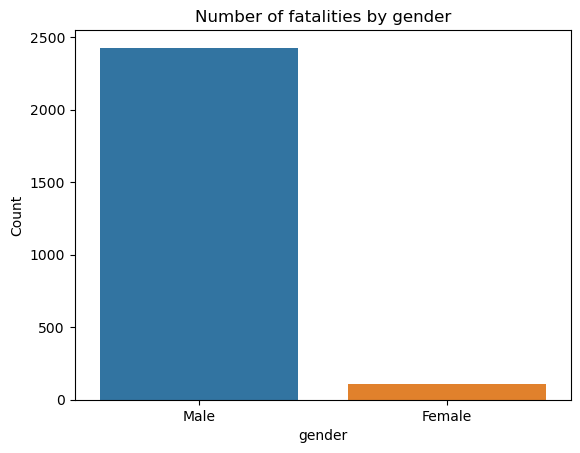

In [55]:
bar = sns.barplot(x=fatalities_gender.index, 
                 y= fatalities_gender.values,
                 hue=fatalities_gender.index)
bar.set(ylabel="Count", title="Number of fatalities by gender")

plt.show()

# Create a Box Plot Showing the gender and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [56]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2526 non-null   object        
 5   age                      2458 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2340 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2470 non-

In [57]:
box = px.box(df_fatalities, 
             x="gender", 
             y="age", 
             color="manner_of_death",
             color_discrete_sequence=["salmon", "saddlebrown"]
            )

box.show()

- overall, the ppl shot by authorities are way more than tasered and shot.

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [58]:
armed_ppl = df_fatalities["armed"].value_counts()
armed_ppl

armed
gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: count, Length: 68, dtype: int64

In [59]:
pct_unarmed = armed_ppl.loc["unarmed"] / armed_ppl.sum()

pct_armed= armed_ppl.drop(index="unarmed").sum() /  armed_ppl.sum()

print(f"percentage of ppl armed before deceased  {pct_armed: .4f}")
print(f"percentage of ppl unarmed before deceased {pct_unarmed: .4f}")

percentage of ppl armed before deceased   0.9323
percentage of ppl unarmed before deceased  0.0677


In [60]:
armed_ppl.drop(index="unarmed", inplace=True)
pie = px.pie(names= armed_ppl.index[:10], values=armed_ppl.values[:10], hole=0.6)

pie.update_layout(title="Armed People before they got eliminated")

pie.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [61]:
df_fatalities.head()

id                name       date   manner_of_death       armed   age  \
0   3          Tim Elliot 2015-01-02              shot         gun 53.00   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun 47.00   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon 32.00   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [62]:
pct_youth_fatalities = (df_fatalities["age"] < 25).sum() / df_fatalities.shape[0]
print("pct of people who were eliminated and were youth ", pct_youth_fatalities)

pct of people who were eliminated and were youth  0.17751479289940827


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

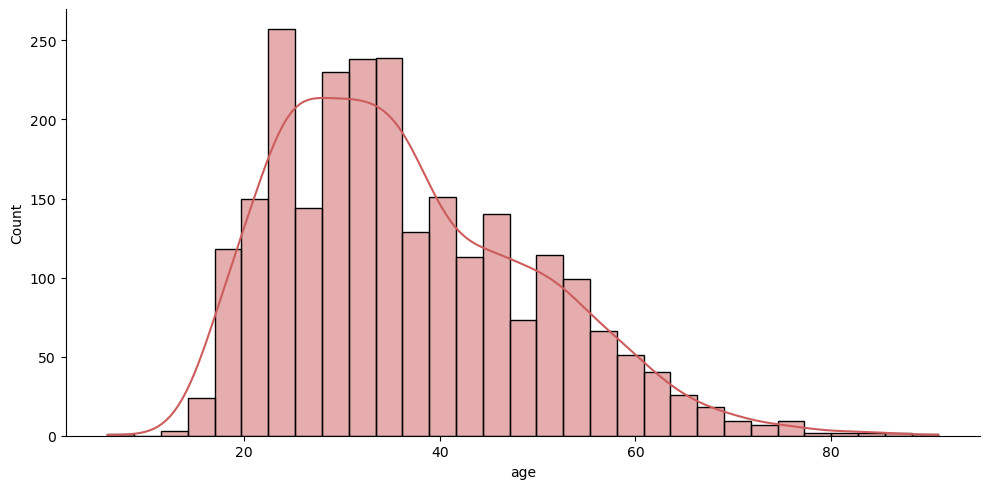

In [63]:
distribution_age = sns.displot(df_fatalities["age"], kde=True, color="indianred", aspect=2)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

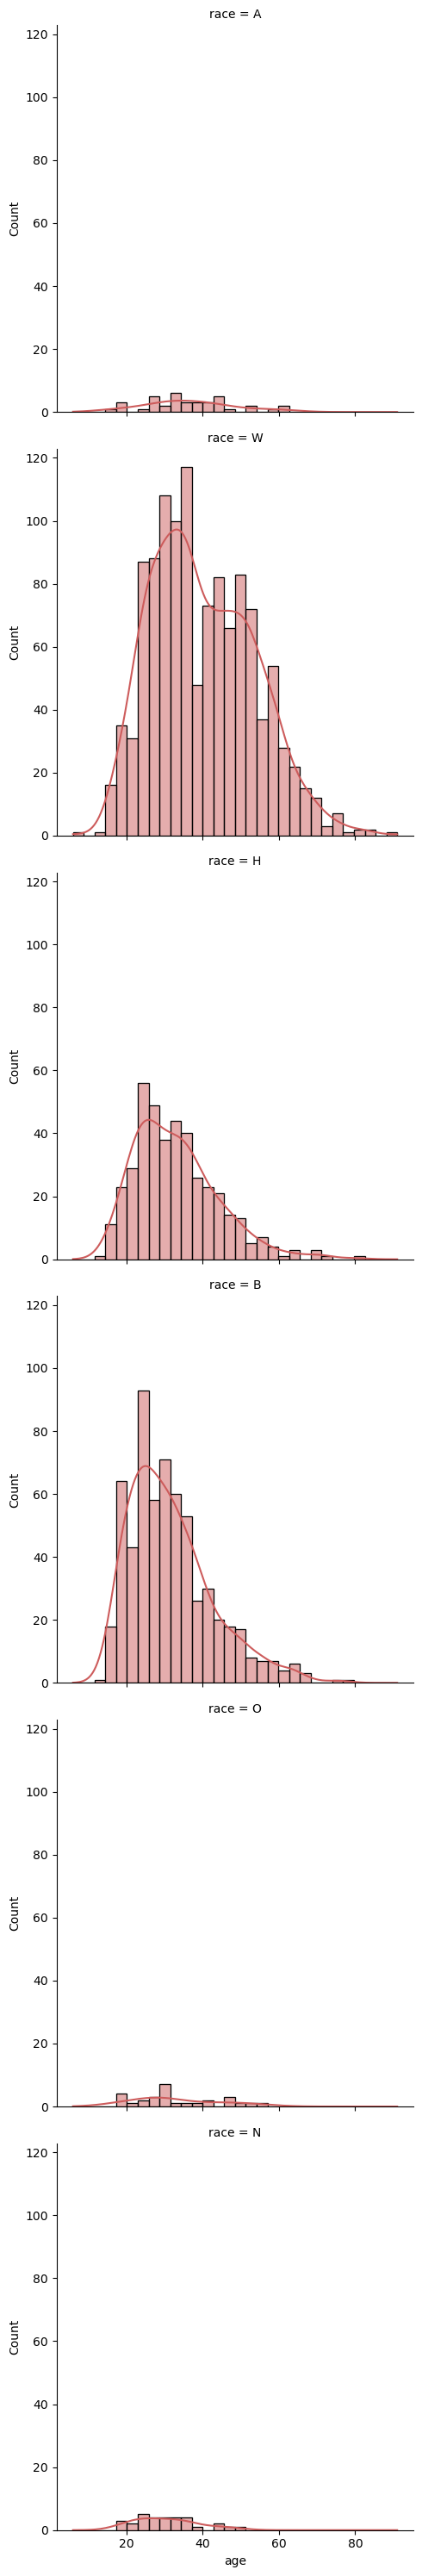

In [64]:
distribution_age = sns.displot(df_fatalities, x="age", row="race", kde=True, color="indianred")

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [65]:
fatalities_race = fatalities_race.reset_index()
fatalities_race

race  count
0            White   1201
1            Black    618
2         Hispanic    423
3            Asian     39
4  Native American     31
5           Others     28

/var/folders/ht/lrmxl1h96cd2dvy26jw5sg5c0000gn/T/ipykernel_9004/3353560112.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




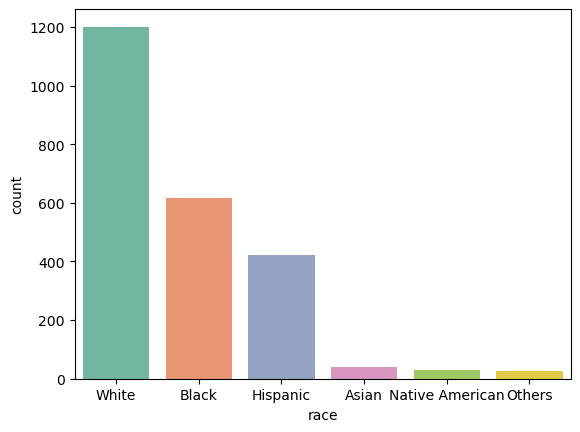

In [66]:
bar = sns.barplot(fatalities_race, x="race", y="count", legend=False, palette='Set2')

plt.show()

In [67]:
#unarmed ppl killed 
df_unarmed = df_fatalities[df_fatalities["armed"] == 'unarmed']
df_unarmed.shape

(171, 14)

In [68]:
unarmed_kill_race = df_unarmed["race"].value_counts()
unarmed_kill_race

race
W    67
B    63
H    34
O     4
N     2
Name: count, dtype: int64

In [69]:
pie = px.pie(names= unarmed_kill_race.index, values=unarmed_kill_race.values, hole=0.6)

pie.update_layout(title="Unarmed People Kill by race")

pie.show()

In [70]:
# Let's see the race demographic of ppl with guns, as 63% were carrying guns.
with_guns = df_fatalities[df_fatalities["armed"] == "gun"]

In [71]:
guns_race = with_guns.race.value_counts()

In [72]:
pie = px.pie(names= guns_race.index, values=guns_race.values, hole=0.6)

pie.update_layout(title="Armed with gun people eliminated by race ")

pie.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [73]:
df_fatalities.signs_of_mental_illness.sum() 

633

In [74]:
pct_metal_ill = df_fatalities.signs_of_mental_illness.sum() / df_fatalities.shape[0] 
print(f"The percent of ppl encountered with mental illness {pct_metal_ill: .4f}")

The percent of ppl encountered with mental illness  0.2497


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [75]:
fatalities_city = df_fatalities["city"].value_counts()[:10]
fatalities_city

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64

In [76]:
bar = px.bar(x=fatalities_city.index, y=fatalities_city.values,
      color=fatalities_city.index)

bar.update_layout(title="Fatalities By City", xaxis_title="cities",
                  yaxis_title="count", coloraxis_showscale=False)

bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [77]:
total_city = df_fatalities.dropna(subset="race")["city"].value_counts()[:10]
total_city

city
Los Angeles     36
Phoenix         28
Houston         26
Chicago         24
Columbus        18
Austin          18
San Antonio     18
Miami           17
Las Vegas       17
Indianapolis    14
Name: count, dtype: int64

In [78]:
df = df_fatalities.dropna(subset="race")
race_count_city = df[df["city"].isin(total_city.index)].groupby(["city", "race"], as_index=False).size()
race_count_city.head()

city race  size
0   Austin    B     3
1   Austin    H     2
2   Austin    W    13
3  Chicago    B    21
4  Chicago    H     1

In [79]:
race_count_city["total_race"] = [total_city.loc[city_name] for city_name in race_count_city["city"]]

race_count_city["pct_cityrace"] = race_count_city["size"] / race_count_city["total_race"]

race_count_city.head()

city race  size  total_race  pct_cityrace
0   Austin    B     3          18          0.17
1   Austin    H     2          18          0.11
2   Austin    W    13          18          0.72
3  Chicago    B    21          24          0.88
4  Chicago    H     1          24          0.04

In [80]:
bar = px.bar(race_count_city, x="city", y="size",
      color="race", hover_data="pct_cityrace")

bar.update_layout(title="Fatalities in pct in various Cities of different race", xaxis_title="cities",
                  yaxis_title="percentage of race in city / total killed in city", coloraxis_showscale=False,
                 xaxis={'categoryorder':'category ascending'})

bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [81]:
#kill count by state
kill_state = df_fatalities["state"].value_counts()

#setting "Geographic Area as a index"
poverty_rate_state.set_index('Geographic Area', inplace=True)

#joining poverty and kill count by state.
killpoverty_state = pd.merge(poverty_rate_state, kill_state, how='inner', left_index=True, right_index=True)

In [82]:
usa_map = px.choropleth(killpoverty_state, scope="usa", locations=killpoverty_state.index,
                        locationmode = 'USA-states',
                        color="count", color_continuous_scale="Viridis",
                       title = "USA state representation of people kill")

usa_map.show()

In [83]:
usa_map = px.choropleth(killpoverty_state, scope="usa", locations=killpoverty_state.index,
                        locationmode = 'USA-states',
                        color="poverty_rate", color_continuous_scale="Viridis",
                       title = "USA state representation of poverty rate")

usa_map.show()

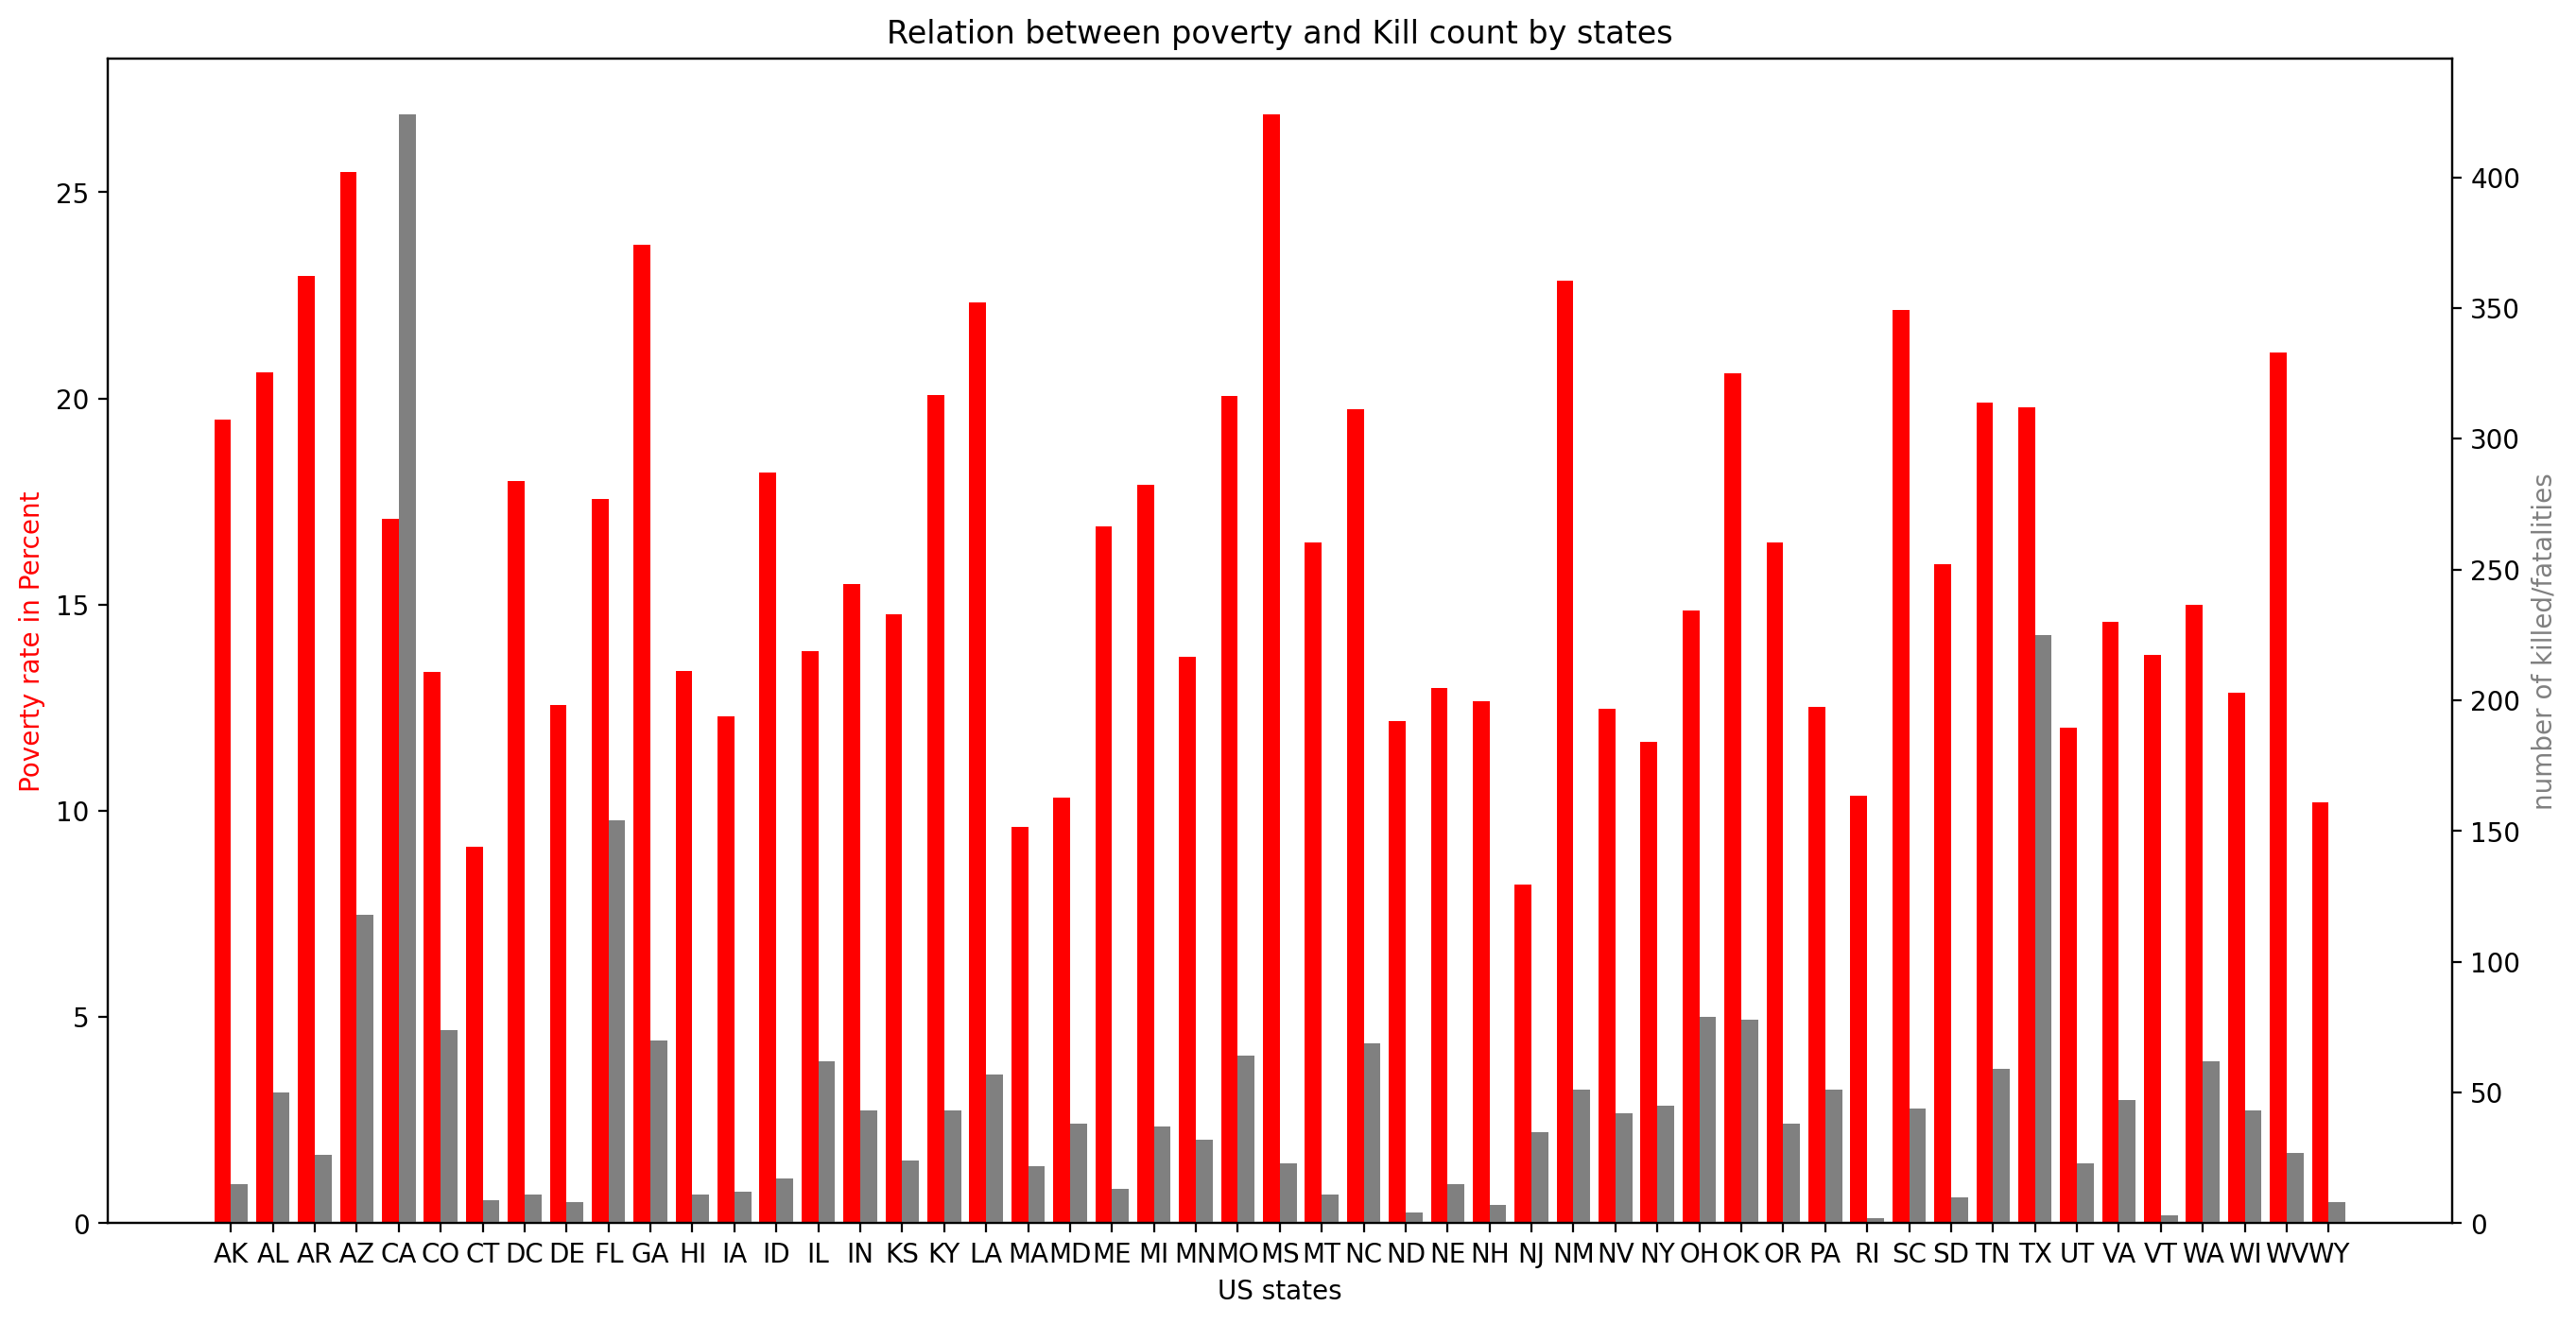

In [84]:
fig, ax = plt.subplots(figsize=(16,8), dpi=200)

n=killpoverty_state.shape[0]
r = np.arange(n) 
width = 0.40

ax.bar(r, killpoverty_state.poverty_rate, color='red', width=width)

ax.set_xlabel("US states")
ax.set_ylabel("Poverty rate in Percent", color='red')

ax.set_xticks(r + width/2, killpoverty_state.index) 

# ax.xaxis.grid(True, color='#ddddee', linestyle='--')

ax.set(title="Relation between poverty and Kill count by states")

ax1 = ax.twinx()

ax1.bar(r + width, killpoverty_state['count'], color='grey', width=width)
ax1.set_ylabel("number of killed/fatalities", color='grey')

# ax1.yaxis.grid(True, color='#ddddee', linestyle='--')


plt.show()

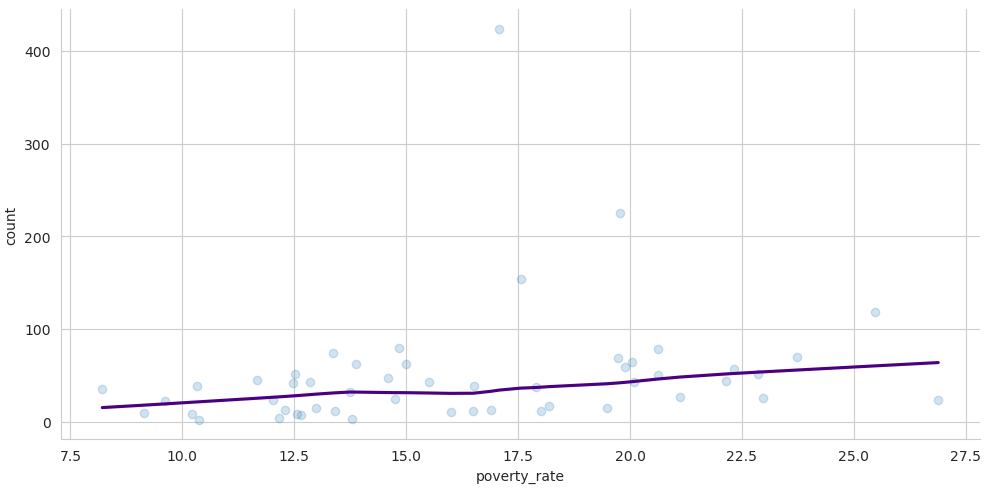

In [85]:
with sns.axes_style("whitegrid"):
    sns.lmplot(killpoverty_state, 
               x="poverty_rate", 
               y="count",
               aspect=2,
               lowess=True,
               scatter_kws = {'alpha': 0.2},
               line_kws={"color":'indigo'})

plt.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

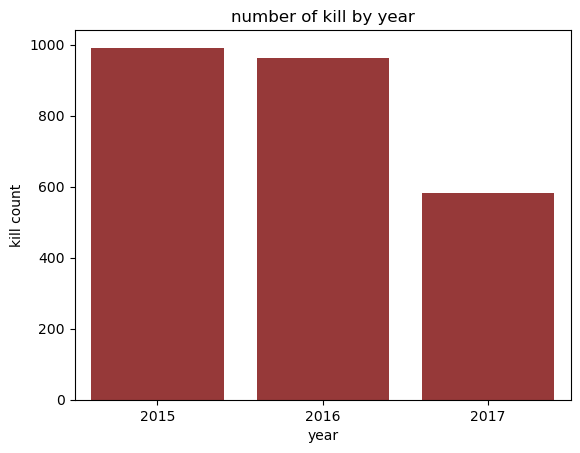

In [86]:
#number of killing by year
kill_year = df_fatalities.groupby(df_fatalities.date.dt.year).size()

ax = sns.barplot(x=kill_year.index, y=kill_year.values, color="brown")

ax.set(title = "number of kill by year", xlabel="year", ylabel="kill count")

plt.show()

In [87]:
kill_year

date
2015    991
2016    963
2017    581
dtype: int64

In [88]:
sort_fatalities = df_fatalities.sort_values("date", ascending=True)

In [89]:
sort_fatalities['year'] = sort_fatalities.date.dt.year

In [90]:
box = px.box(sort_fatalities, 
             x="year", 
             y="age", 
             color="gender",
             color_discrete_sequence=["#1434A4", "#B5338A"]
            )

box.show()

In [91]:
sort_fatalities.tail()

id                name       date manner_of_death    armed   age  \
2529  2819    Brian J. Skinner 2017-07-28            shot    knife 32.00   
2530  2822    Rodney E. Jacobs 2017-07-28            shot      gun 31.00   
2532  2818  Dennis W. Robinson 2017-07-29            shot      gun 48.00   
2533  2817       Isaiah Tucker 2017-07-31            shot  vehicle 28.00   
2534  2815        Dwayne Jeune 2017-07-31            shot    knife 32.00   

     gender race         city state  signs_of_mental_illness threat_level  \
2529      M  NaN    Glenville    NY                     True        other   
2530      M  NaN  Kansas City    MO                    False       attack   
2532      M  NaN        Melba    ID                    False       attack   
2533      M    B      Oshkosh    WI                    False       attack   
2534      M    B     Brooklyn    NY                     True       attack   

             flee  body_camera  year  
2529  Not fleeing        False  2017  
2530  Not fleeing        False  2017  
2532          Car        False  2017  
2533          Car         True  2017  
2534  Not fleeing        False  2017

In [92]:
#by quarter number of killing 

kill_quarter = sort_fatalities.groupby(sort_fatalities['date'].dt.to_period('Q')).size()
kill_quarter

date
2015Q1    245
2015Q2    220
2015Q3    280
2015Q4    246
2016Q1    259
2016Q2    239
2016Q3    232
2016Q4    233
2017Q1    268
2017Q2    225
2017Q3     88
Freq: Q-DEC, dtype: int64

In [93]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

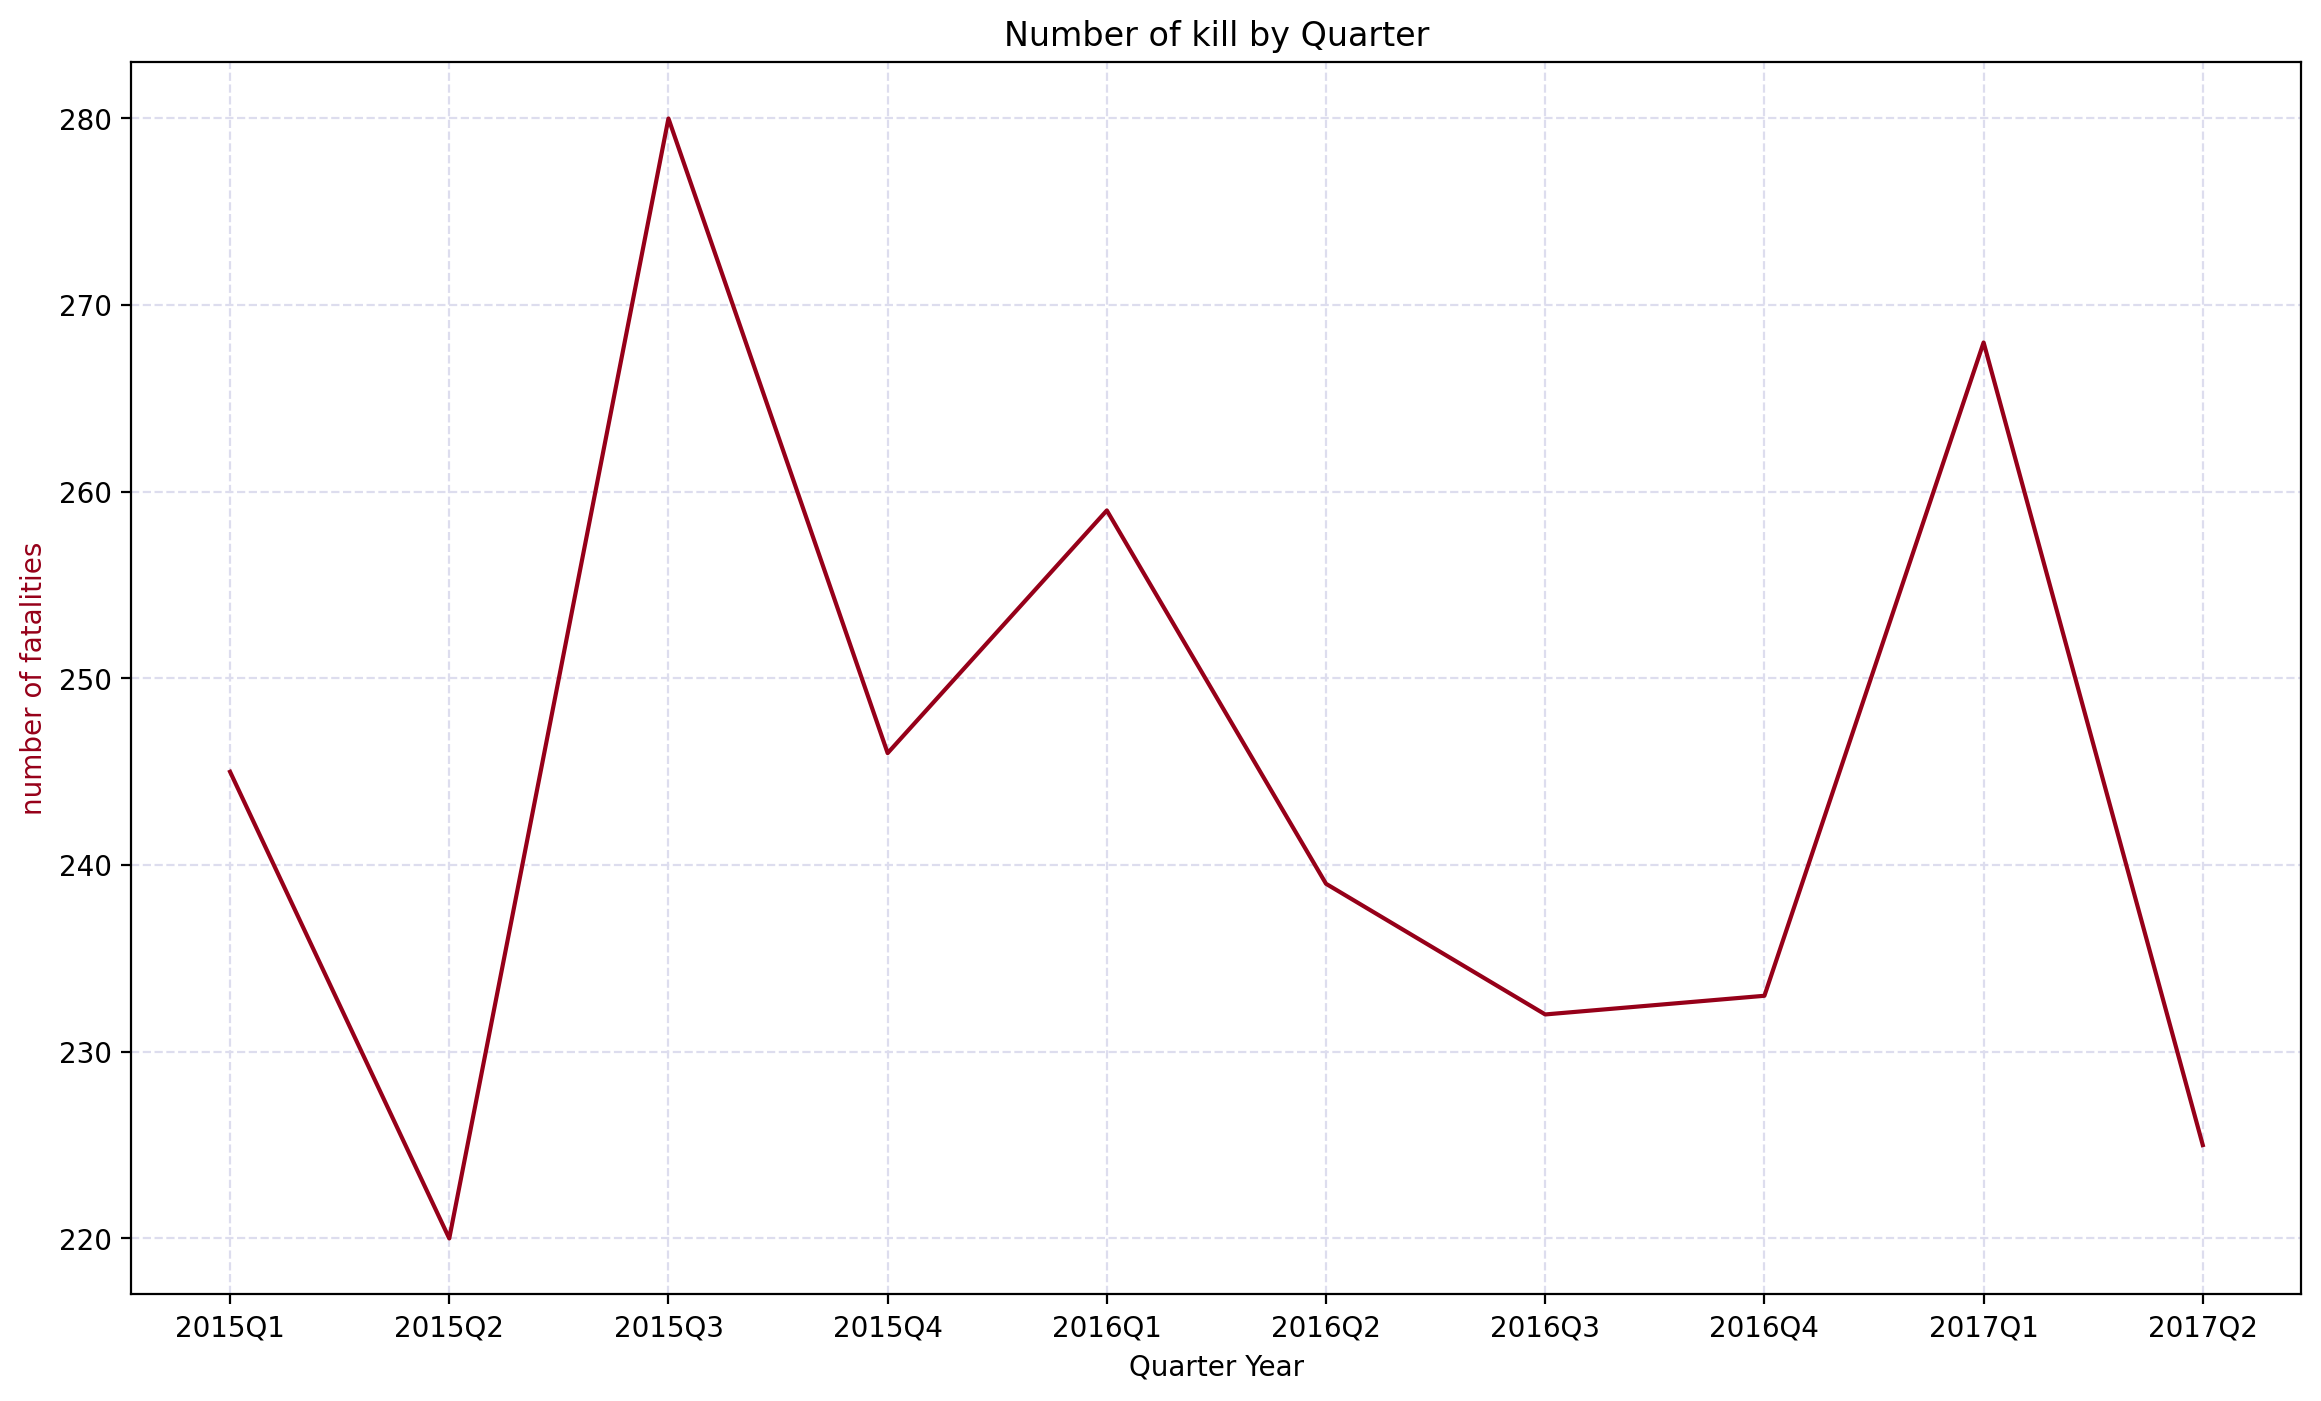

In [94]:
fig, ax = plt.subplots(figsize=(14,8), dpi=200)

ax.plot(kill_quarter.values[:-1], c='#960019')
ax.set_xlabel("Quarter Year")
ax.set_ylabel("number of fatalities", color='#960019')

ax.xaxis.grid(True, color='#ddddee', linestyle='--')
ax.yaxis.grid(True, color='#ddddee', linestyle='--')

ax.set_xticks(ticks =np.arange(10), labels=kill_quarter.index[:-1])

ax.set(title="Number of kill by Quarter")

plt.show()

In [95]:
#fleeing by the year
flee_year = df_fatalities.groupby([df_fatalities.date.dt.year, 'flee'], as_index=False).size()
flee_year = flee_year[flee_year["flee"] != "Other"]
flee_year

date         flee  size
0   2015          Car   143
1   2015         Foot   108
2   2015  Not fleeing   712
4   2016          Car   143
5   2016         Foot   120
6   2016  Not fleeing   631
8   2017          Car    99
9   2017         Foot    66
10  2017  Not fleeing   352

In [96]:
fig = px.bar(flee_year, x="date", y='size', color='flee')
fig.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

This analysis sheds light on critical social, economic, and systemic issues across the United States by evaluating trends and disparities in police-related fatalities, poverty, education, and race distribution.

**Poverty and Education**
The poverty rate varied significantly by state, with New Jersey having the lowest at 8.11% and Mississippi the highest at 27%. Similarly, the high school graduation rate ranged from 76% in Texas to 92.38% in Mississippi. A clear relationship emerged: states with higher poverty rates tended to have lower high school graduation rates, showing how economic hardship impacts educational outcomes.

**Racial Distribution**
Texas and New Mexico had the highest Hispanic populations, at 39% and 45%, respectively. Washington, D.C., stood out for having a majority Black population (50%), exceeding the proportion of White residents. Asian populations were consistently lower across all states, while in Alaska, Native Americans and Whites were equally represented.

**Fatalities by Race and Gender**
From 2015 to 2017, police-related fatalities totaled 2,535 individuals. Racially, 51.3% were White, 26.4% Black, and 18% Hispanic. By gender, 2,428 men and 107 women were killed. For unarmed individuals, Whites accounted for 39% of deaths, Blacks 37%, and Hispanics 20%.

**Age and Armed Status**
The median age of individuals killed was around 35. The youngest male killed was 6 years old, while the youngest female was 12. Most victims (93.23%) were armed, predominantly with guns (62%). Others were armed with knives (16.72%), vehicles (7.93%), or toy weapons (4.66%). Only 6.77% of the deceased were unarmed.

**Mental Health and Fleeing**
Almost 25% of individuals killed showed signs of mental illness, highlighting the need for specialized intervention. Regarding fleeing, most victims (72%) did not attempt to escape, while 485 tried to flee by car and 294 on foot across the years.

**Fatalities by State and Cities**
California had the highest number of police-related fatalities, despite a relatively low poverty rate. Mississippi, with the highest poverty rate, had fewer fatalities. Los Angeles recorded the most fatalities (39), with 52.77% of victims being Hispanic. Chicago had 24 fatalities, 87% of whom were Black. In Phoenix, 40% of those killed were White, and another 40% were Hispanic.

**Yearly and Quarterly Trends**
Fatalities peaked in 2015 (991 deaths) and decreased to 963 in 2016 and 581 in 2017. Quarterly data showed that Q3 of 2015 had the highest fatalities (280), while Q2 of 2017 recorded the fewest (225).


**Key Observations**
This analysis shows how socioeconomic and racial factors intersect with systemic challenges. The data highlights not just the disparities in police-related fatalities but also the broader impact of poverty, education, and racial inequalities. It emphasizes the urgent need for policy reforms, better mental health resources, and approaches that address systemic inequalities.